In [1]:
import requests
import pandas as pd

In [2]:
city = 'lagos'

In [3]:
df = pd.read_csv('geo_sampling/{0:s}-roads-s1k.csv'.format(city))
#df = df.sample(10)

In [4]:
API_KEY = 'GOOGLE_MAPS_API_KEY'

## Get Google Maps Street View metadata

In [5]:
def gsv_metadata(lat, lon):
    data = {'key': API_KEY,
                'location':  '{0:f},{1:f}'.format(lat, lon)}
    r = requests.get('https://maps.googleapis.com/maps/api/streetview/metadata', params=data)
    if r.status_code == 200:
        return r.json()
    else:
        print("WARN: No metadata for {0:f},{1:f}".format(lat, lon))
        return None

In [6]:
df['gsv_metadata'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_metadata(r.start_lat, r.start_long), axis=1)

In [7]:
mdf = pd.concat([df, df.gsv_metadata.apply(pd.Series)], axis=1)

In [8]:
mdf[['osm_type', 'start_lat', 'start_long', 'date', 'status', 'pano_id', 'copyright']]

osm_type  start_lat  start_long     date        status  \
0    secondary   6.657005    3.310365  2017-01            OK   
1    secondary   6.653334    3.311008  2017-01            OK   
2    secondary   6.654032    3.311050  2017-01            OK   
3      primary   6.460233    3.432869  2016-11            OK   
4      primary   6.441980    3.426376  2016-11            OK   
5    secondary   6.430002    3.419532  2016-11            OK   
6    secondary   6.430690    3.415092  2016-11            OK   
7      primary   6.438571    3.374536  2016-12            OK   
8      primary   6.554141    3.324878  2016-10            OK   
9      primary   6.552200    3.328963  2016-11            OK   
10     primary   6.550282    3.333058  2016-11            OK   
11   secondary   6.544785    3.351704  2016-11            OK   
12   secondary   6.641102    3.330851  2017-01            OK   
13   secondary   6.644119    3.327540  2017-01            OK   
14    tertiary   6.628346    3.341537  2016-10            OK   
15    tertiary   6.631830    3.349868  2016-10            OK   
16   secondary   6.630217    3.354033  2016-10            OK   
17   secondary   6.620787    3.325292  2017-02            OK   
18   secondary   6.618469    3.321491  2017-02            OK   
19   secondary   6.518586    3.077754  2017-03            OK   
20   secondary   6.660434    3.279153  2017-01            OK   
21   secondary   6.653902    3.273029  2017-01            OK   
22   secondary   6.650012    3.271133  2017-01            OK   
23   secondary   6.638500    3.265759  2017-01            OK   
24   secondary   6.630912    3.259560  2017-01            OK   
25   secondary   6.622412    3.257329  2017-01            OK   
26   secondary   6.529121    3.318000  2016-11            OK   
27   secondary   6.528419    3.326506  2016-11            OK   
28    tertiary   6.645457    3.369167      NaN  ZERO_RESULTS   
29   secondary   6.660906    3.353116  2017-01            OK   
..         ...        ...         ...      ...           ...   
970  secondary   6.431021    3.467748  2016-12            OK   
971   tertiary   6.403613    4.228968      NaN  ZERO_RESULTS   
972   tertiary   6.402388    4.242457      NaN  ZERO_RESULTS   
973   tertiary   6.401372    4.246861      NaN  ZERO_RESULTS   
974   tertiary   6.399354    4.260268      NaN  ZERO_RESULTS   
975   tertiary   6.399905    4.290917      NaN  ZERO_RESULTS   
976   tertiary   6.400712    4.326985      NaN  ZERO_RESULTS   
977   tertiary   6.400939    4.331499      NaN  ZERO_RESULTS   
978  secondary   6.629764    3.338031  2017-01            OK   
979  secondary   6.668380    3.325330  2017-01            OK   
980  secondary   6.670838    3.329127  2017-01            OK   
981  secondary   6.671691    3.333428  2017-01            OK   
982  secondary   6.638120    3.323728  2017-01            OK   
983  secondary   6.633609    3.324051      NaN  ZERO_RESULTS   
984  secondary   6.647113    3.323353  2017-01            OK   
985  secondary   6.493380    3.348588  2016-12            OK   
986    primary   6.437526    3.424591  2016-11            OK   
987    primary   6.438643    2.902940  2017-03            OK   
988   tertiary   6.460468    3.640300  2017-03            OK   
989   tertiary   6.664761    3.523546      NaN  ZERO_RESULTS   
990  secondary   6.471522    3.793137  2017-03            OK   
991  secondary   6.471479    3.797658  2016-11            OK   
992  secondary   6.448426    3.459624  2016-11            OK   
993    primary   6.453343    3.430673  2016-11            OK   
994    primary   6.457598    3.432206  2016-11            OK   
995  secondary   6.447140    3.439955  2016-11            OK   
996  secondary   6.459518    3.435615  2016-11            OK   
997  secondary   6.445283    3.434400  2016-11            OK   
998    primary   6.428817    3.408930  2016-11            OK   
999    primary   6.457102    3.409487  2016-11            OK   

                    pano_id      copy

In [9]:
mdf.groupby('date').agg({'status': 'count'})

status
date           
2016-10      64
2016-11     362
2016-12     110
2017-01      77
2017-02      95
2017-03     107
2017-04      57

In [10]:
mdf[mdf.status != 'OK']

segment_id     osm_id                   osm_name   osm_type  start_lat  \
28           91    5217450                        NaN   tertiary   6.645457   
76          246   11102624              Iganmode Road   tertiary   6.599983   
77          249   11102624              Iganmode Road   tertiary   6.587143   
146         476   75315747                        NaN   tertiary   6.452554   
150         492   88260945                        NaN      trunk   6.461799   
176         566   93855590                        NaN  secondary   6.459791   
187         598  110159861                Sagamu Road      trunk   6.636289   
188         601  110159861                Sagamu Road      trunk   6.648658   
189         603  110159861                Sagamu Road      trunk   6.657507   
190         606  110159861                Sagamu Road      trunk   6.668645   
219         690  133766192                        NaN      trunk   6.469496   
220         692  133766198             Ijora Causeway      trunk   6.469004   
226         717  133795067             Ijora Causeway      trunk   6.469270   
228         719  133795075             Ijora Causeway      trunk   6.469100   
229         720  133795077                 Apapa Road      trunk   6.453085   
230         722  133795081             Ijora Causeway      trunk   6.469590   
284         908  134167584                        NaN   tertiary   6.433148   
285         920  134170110                        NaN   tertiary   6.435464   
314        1017  134414162  Lagos-Abeokuta Expressway      trunk   6.651428   
402        1291  136432607                        NaN   tertiary   6.567574   
410        1313  144077111          New Festac Bridge  secondary   6.467721   
417        1331  144077144     New Festac Bridge Road  secondary   6.467635   
418        1332  144077144     New Festac Bridge Road  secondary   6.469733   
422        1347  144077147                        NaN   tertiary   6.458872   
424        1356  144135045                        NaN  secondary   6.564886   
425        1360  144135045                        NaN  secondary   6.581924   
426        1361  144135045                        NaN  secondary   6.586129   
427        1364  144135045                        NaN  secondary   6.599413   
428        1366  144135045                        NaN  secondary   6.607697   
429        1367  144135045                        NaN  secondary   6.610444   
..          ...        ...                        ...        ...        ...   
893        2841  370571462                        NaN   tertiary   6.468207   
894        2842  370571462                        NaN   tertiary   6.466728   
895        2844  370575839                        NaN   tertiary   6.473841   
896        2852  370575842                        NaN   tertiary   6.470377   
897        2853  370575843                        NaN   tertiary   6.474178   
898        2854  370575843                        NaN   tertiary   6.477845   
899        2861  370575843                        NaN   tertiary   6.497019   
900        2862  370575843                        NaN   tertiary   6.499231   
901        2863  370575843                        NaN   tertiary   6.501768   
902        2864  370575843                        NaN   tertiary   6.504397   
933        2944  371166058                        NaN   tertiary   6.678356   
934        2946  371166058                        NaN   tertiary   6.670312   
935        2948  371166058                        NaN   tertiary   6.661436   
936        2951  371166058                        NaN   tertiary   6.650228   
937        2952  371166058                        NaN   tertiary   6.645731   
938        2953  371166058                        NaN   tertiary   6.641260   
944        2966  371318675                        NaN   tertiary   6.418113   
945        2969  371318675                        NaN   tertiary   6.417645   
946        2974  371318675                        NaN  

In [11]:
df = mdf[mdf.status == 'OK'].copy()

## Get Google Maps Street View Image

In [12]:
from base64 import b64encode, b64decode

def gsv_image(lat, lon, heading=0, pitch=0, size='640x640'):
    data = {'key': API_KEY,
                'location':  '{0:f},{1:f}'.format(lat, lon),
                'heading': '{0:d}'.format(heading),
                'pitch': '{0:d}'.format(pitch),
                'size': size}
    r = requests.get('https://maps.googleapis.com/maps/api/streetview', params=data)
    if r.status_code == 200:
        return b64encode(r.content)
    else:
        print(r.status_code)
        print(r.text)
        print("WARN: No image data for {0:f},{1:f}".format(lat, lon))
        return None

In [13]:
df['img0'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 0, -15), axis=1)
df['img90'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 90, -15), axis=1)
df['img180'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 180, -15), axis=1)
df['img270'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 270, -15), axis=1)

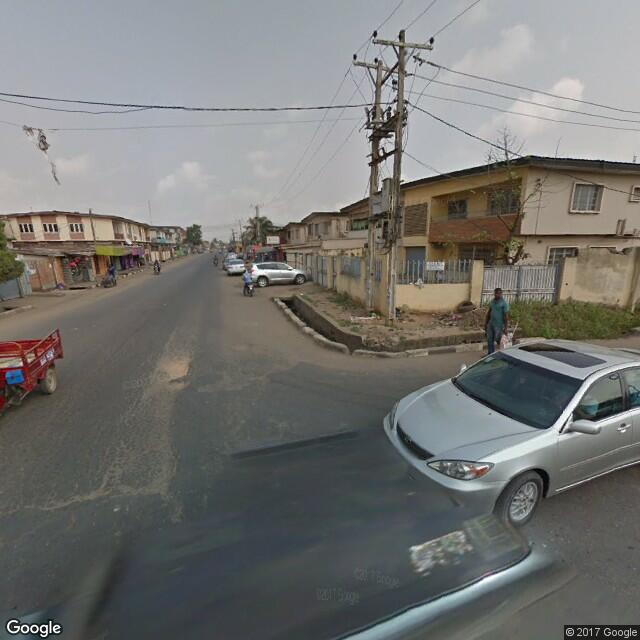

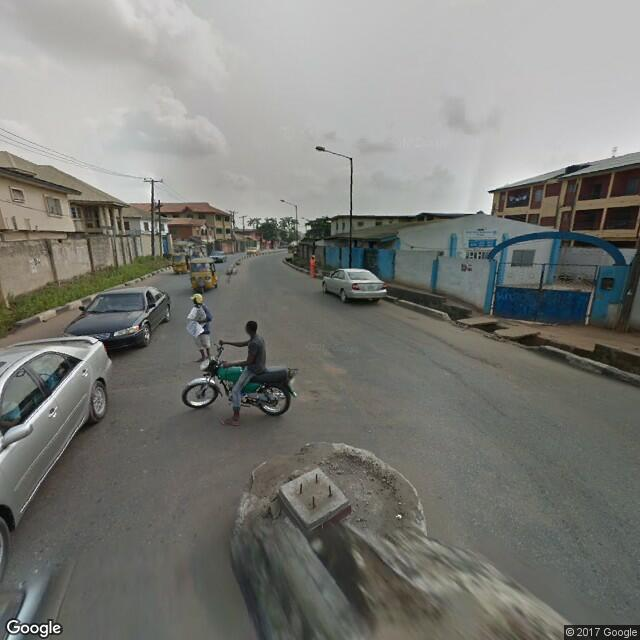

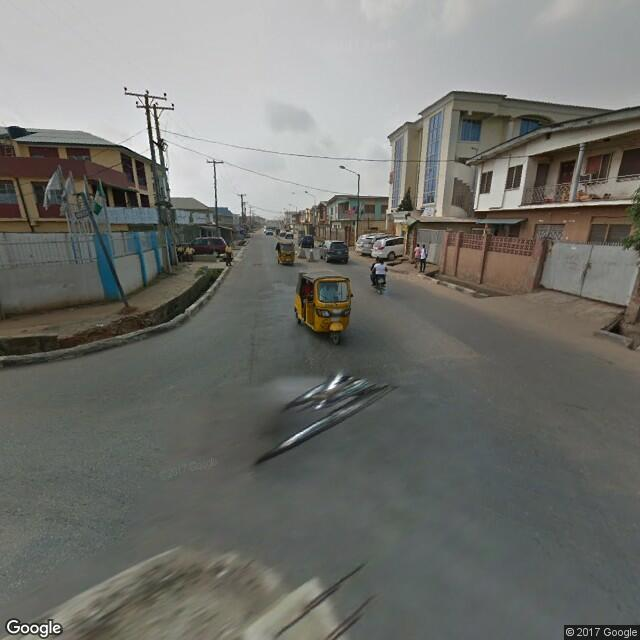

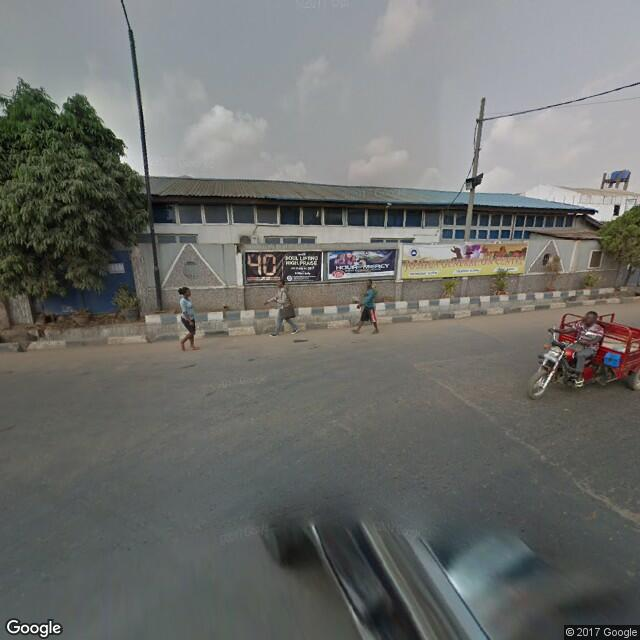

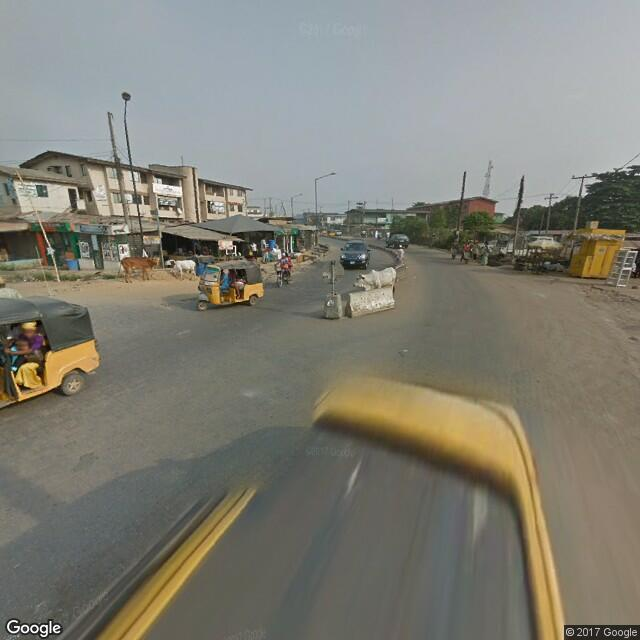

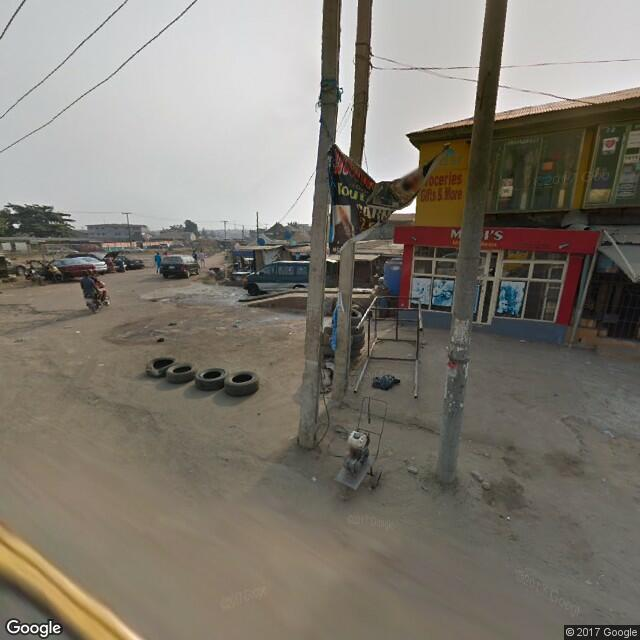

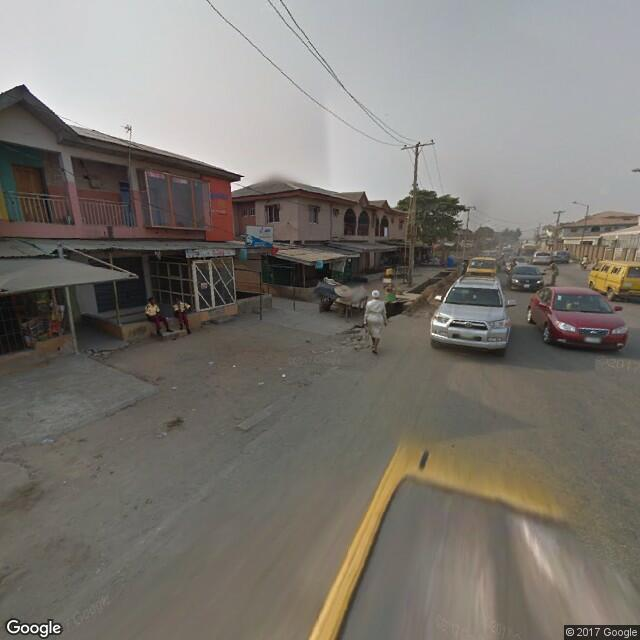

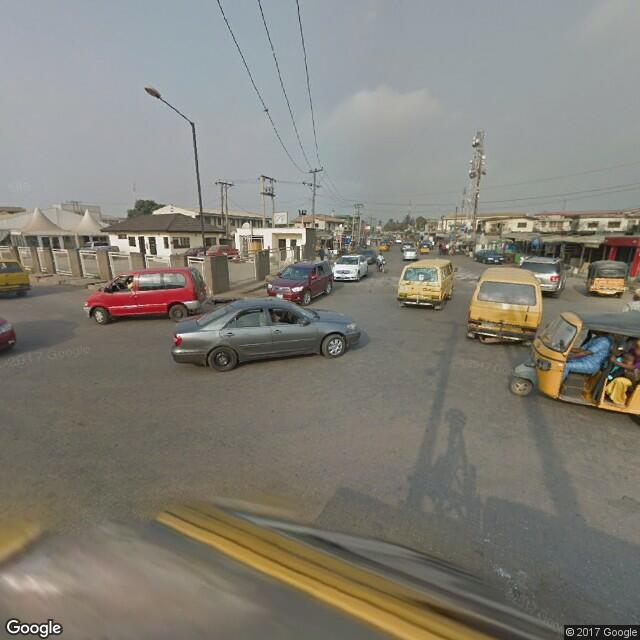

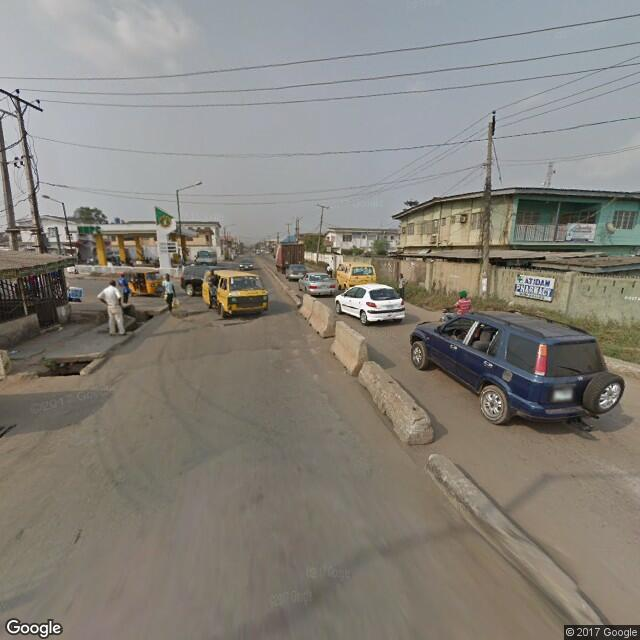

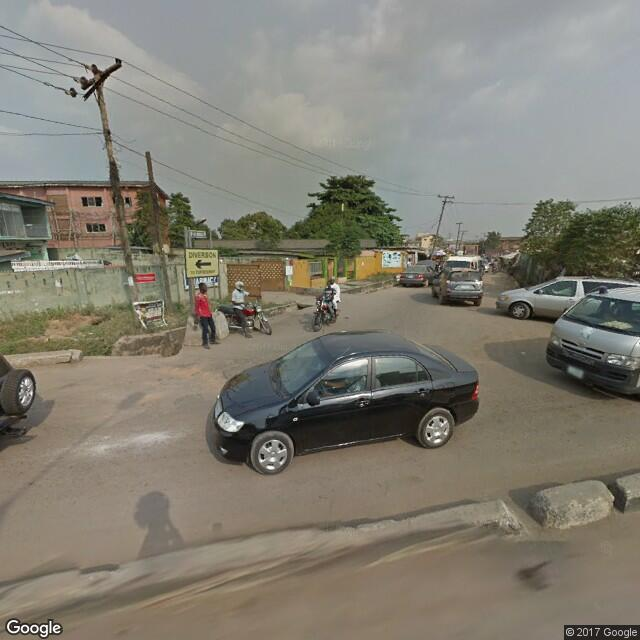

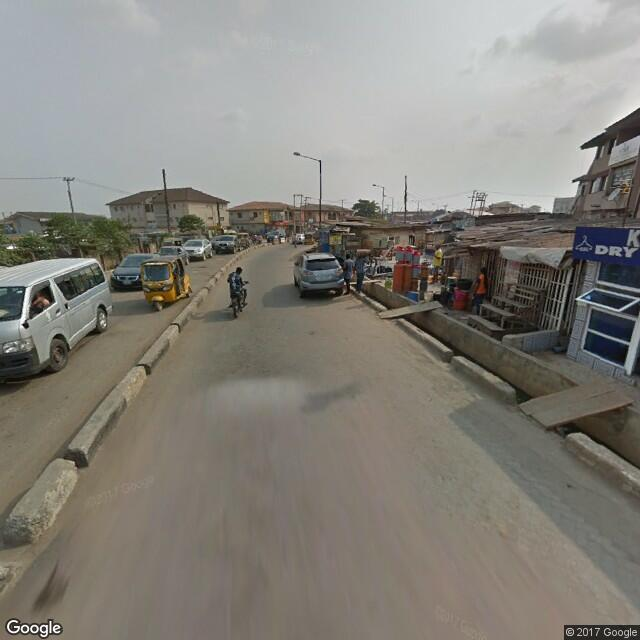

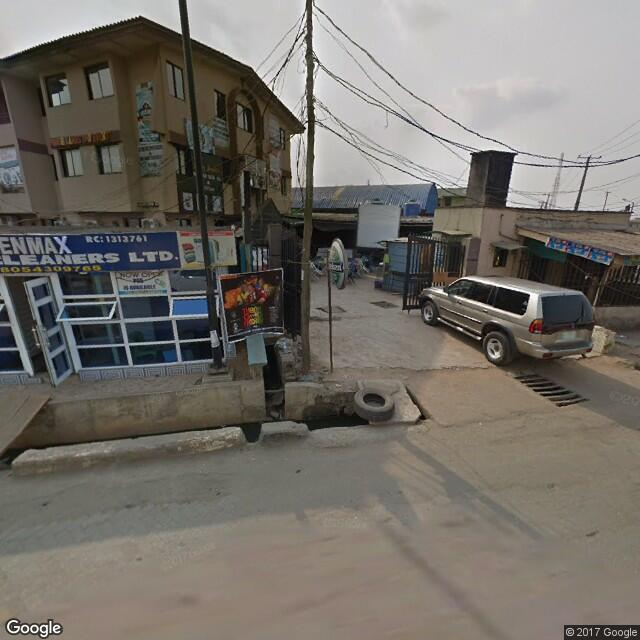

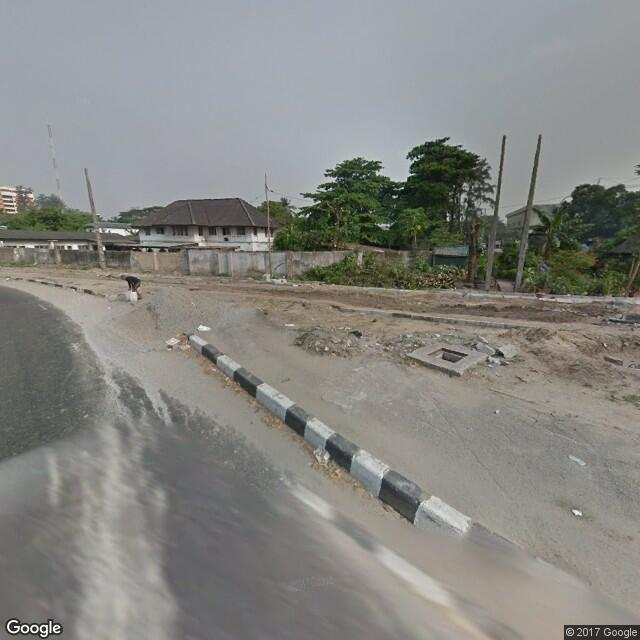

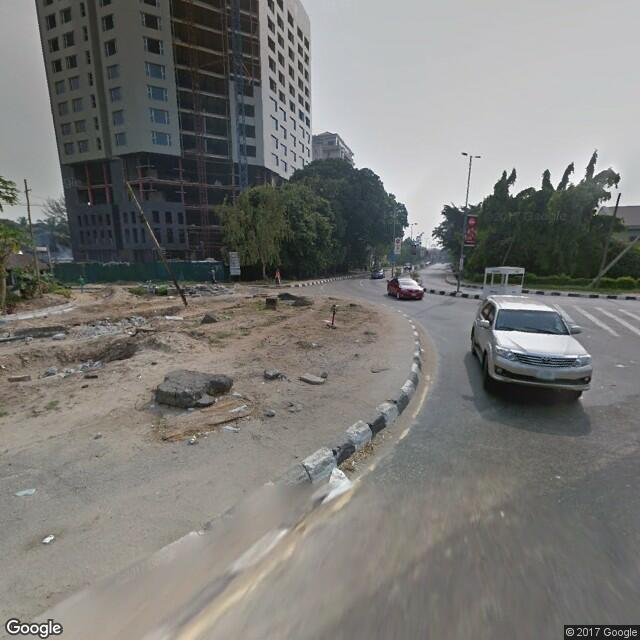

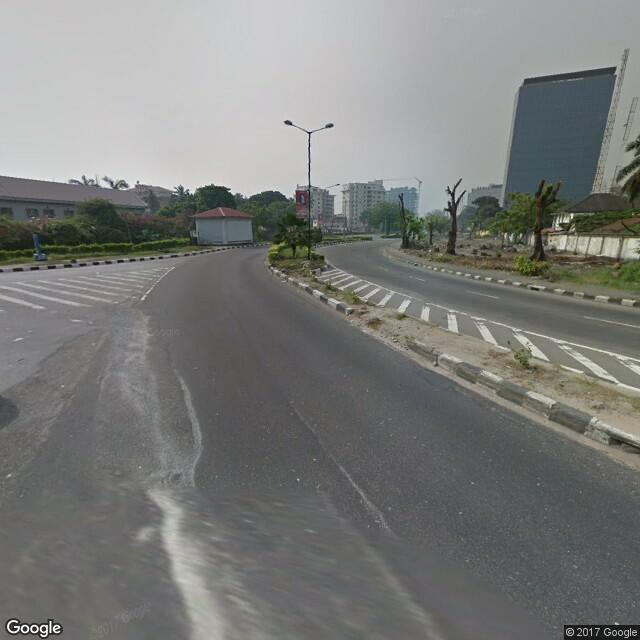

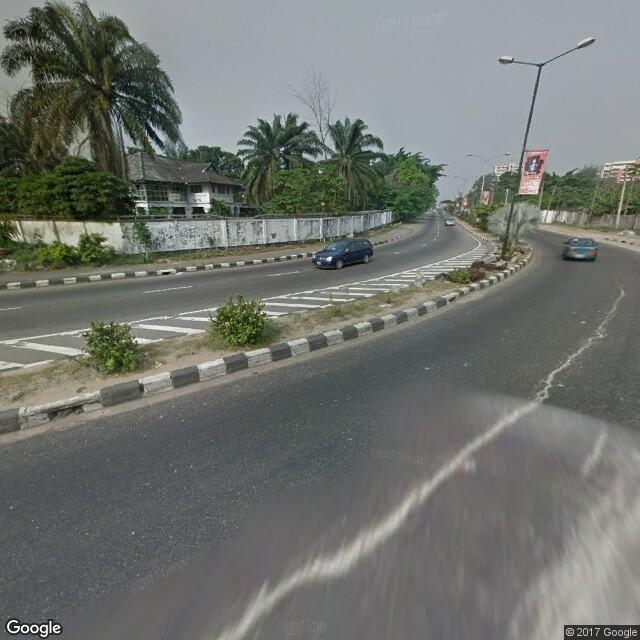

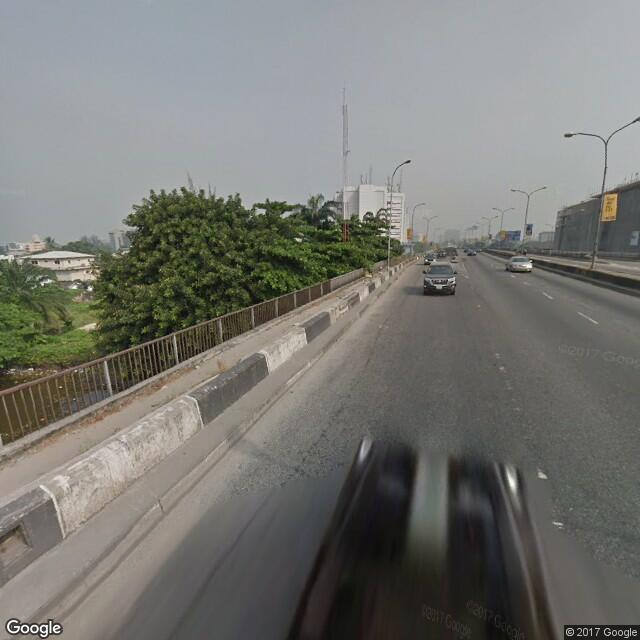

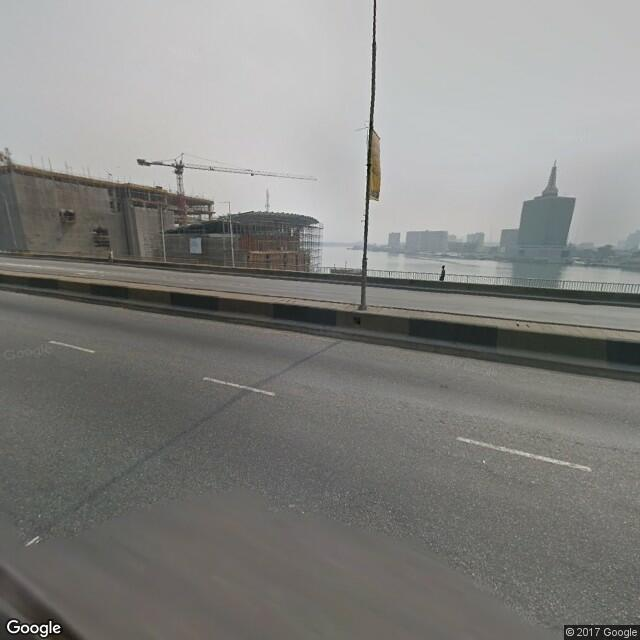

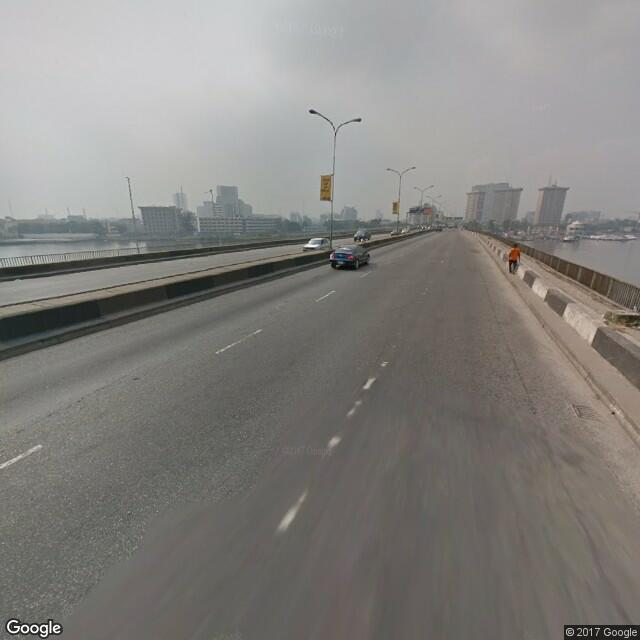

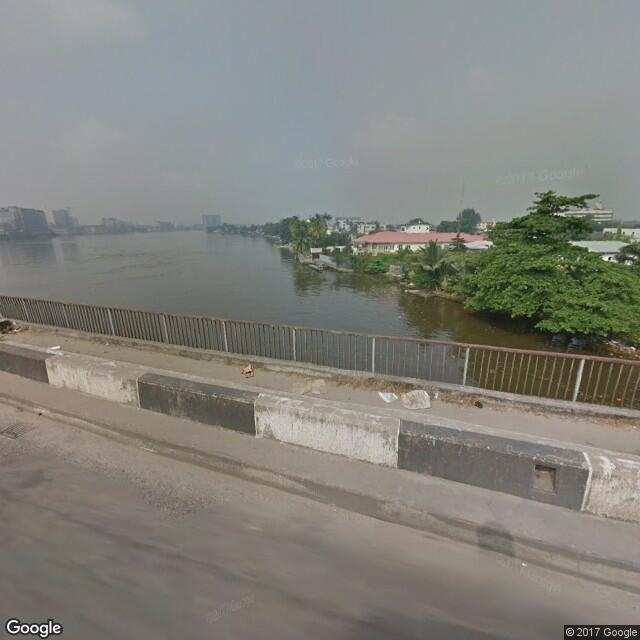

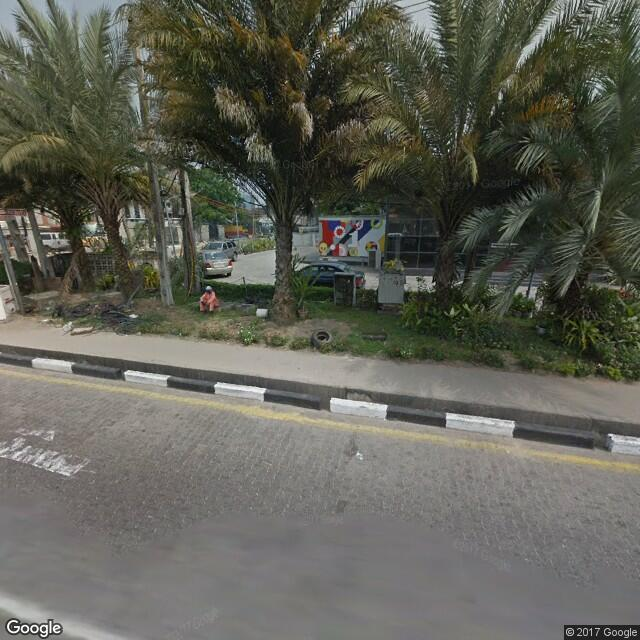

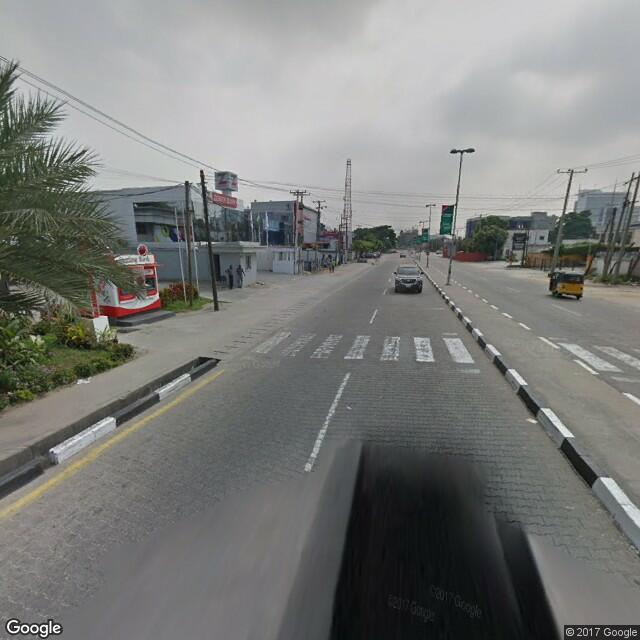

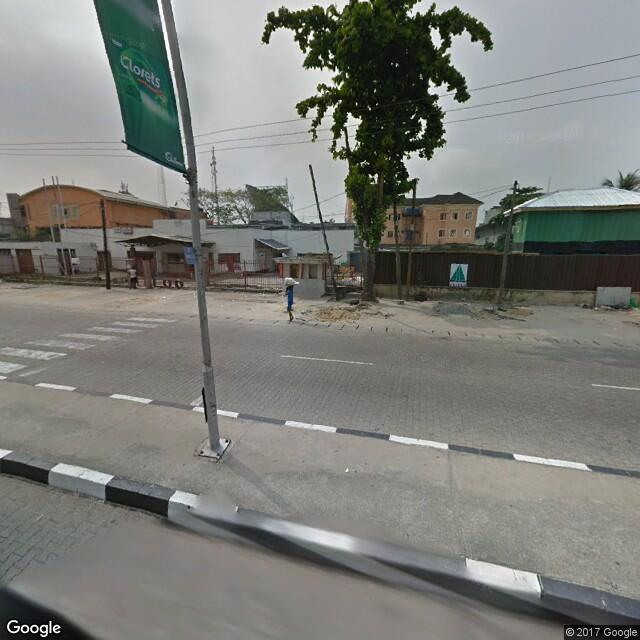

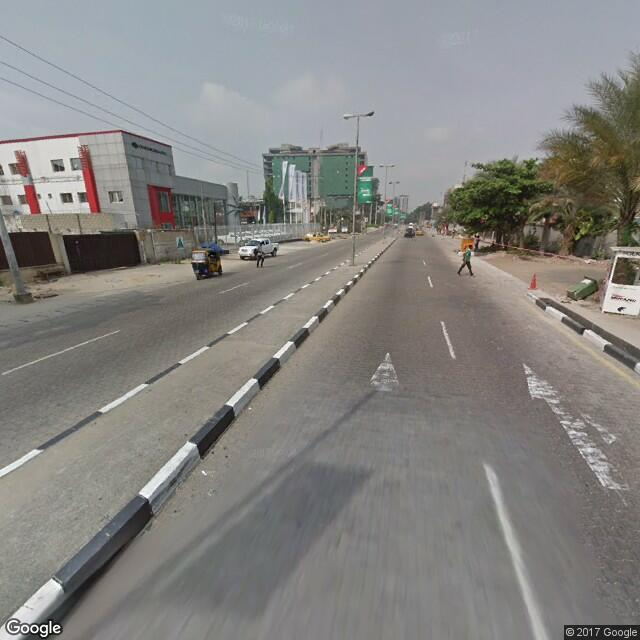

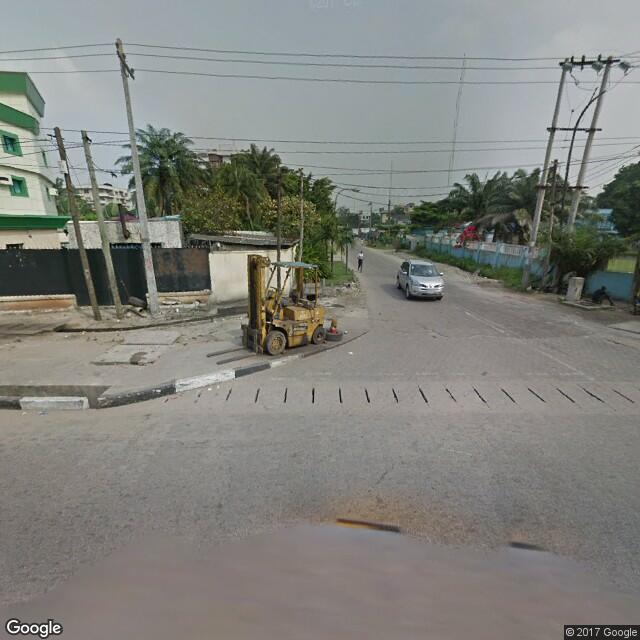

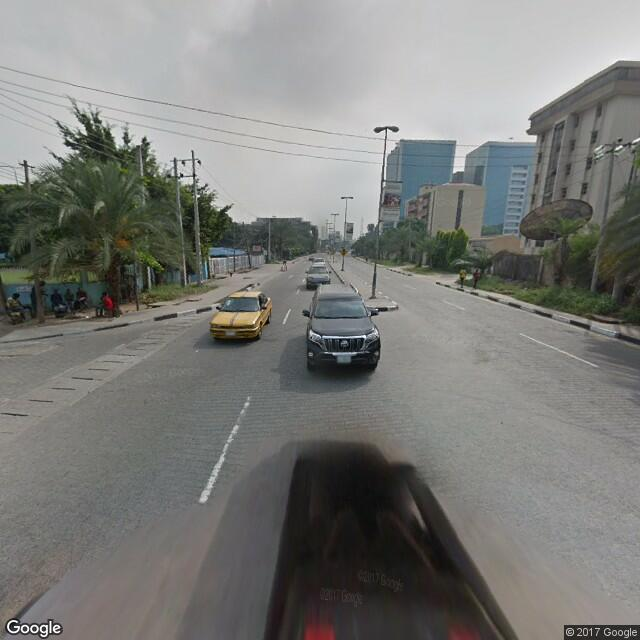

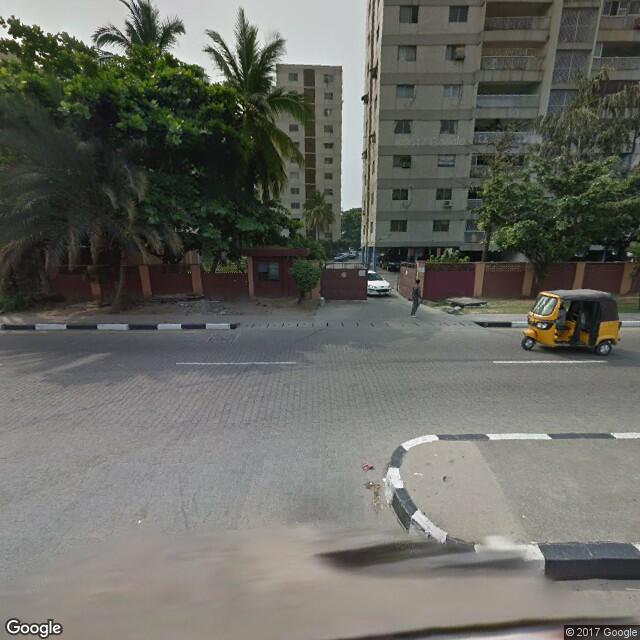

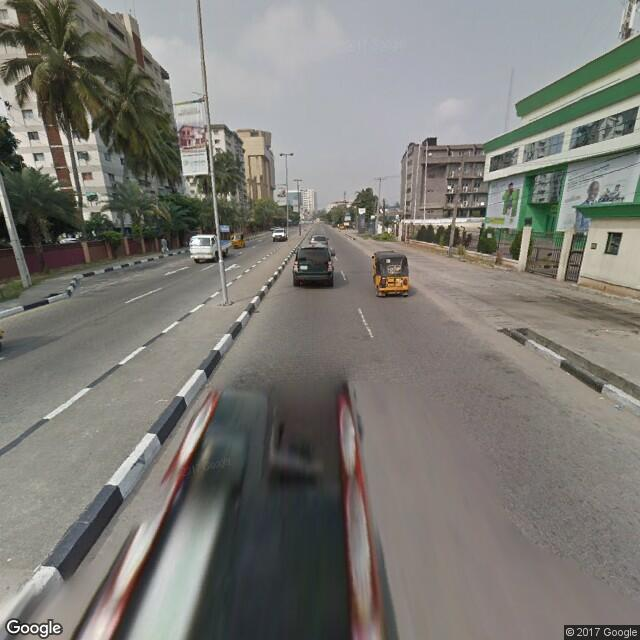

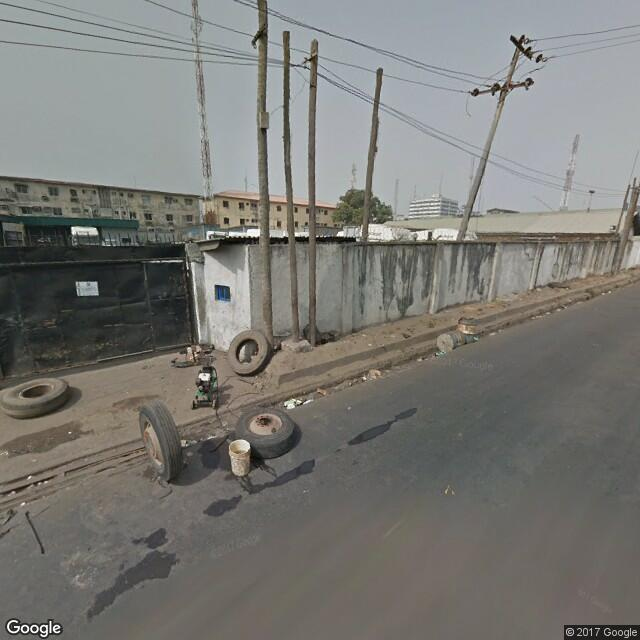

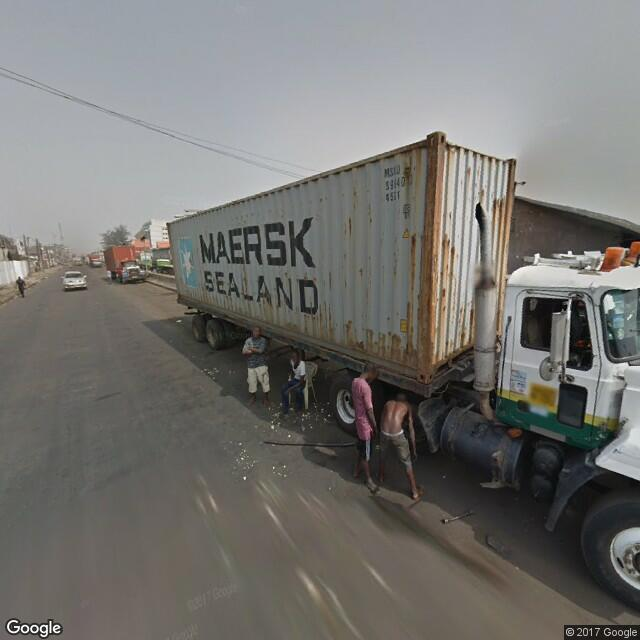

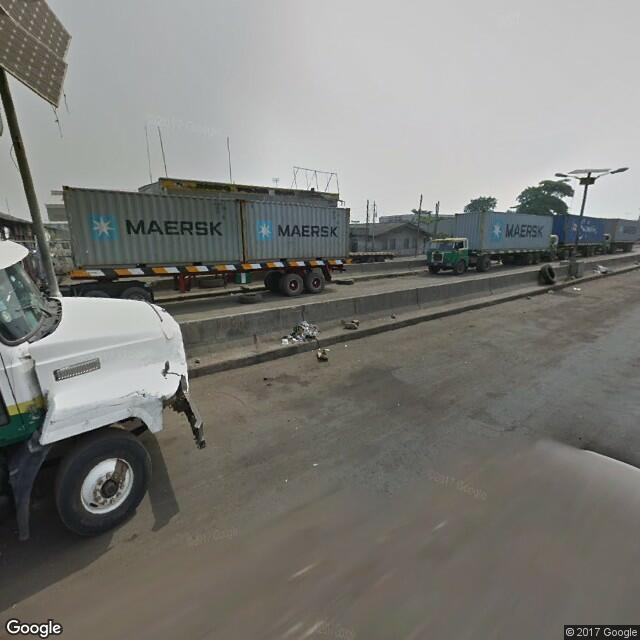

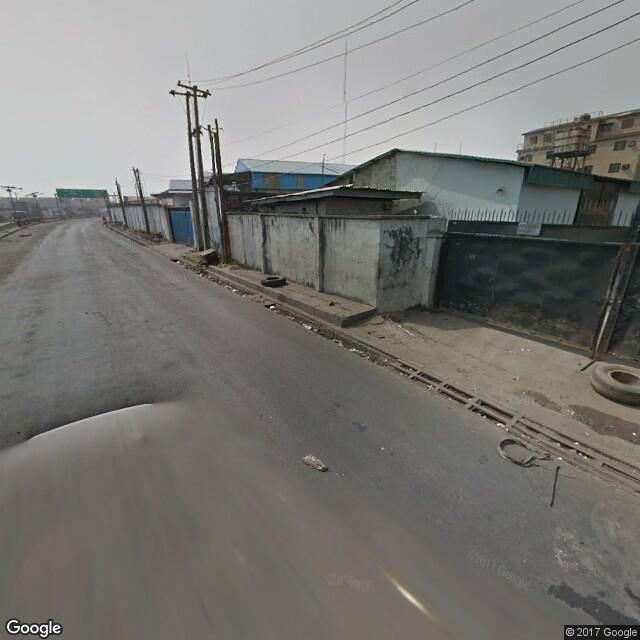

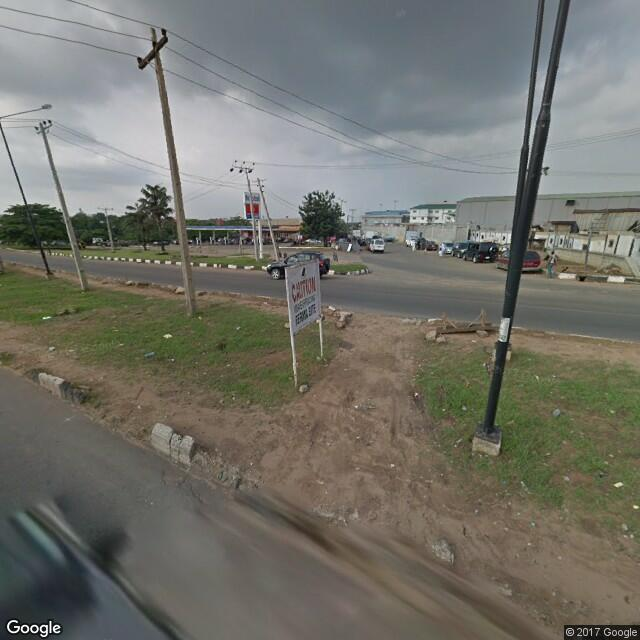

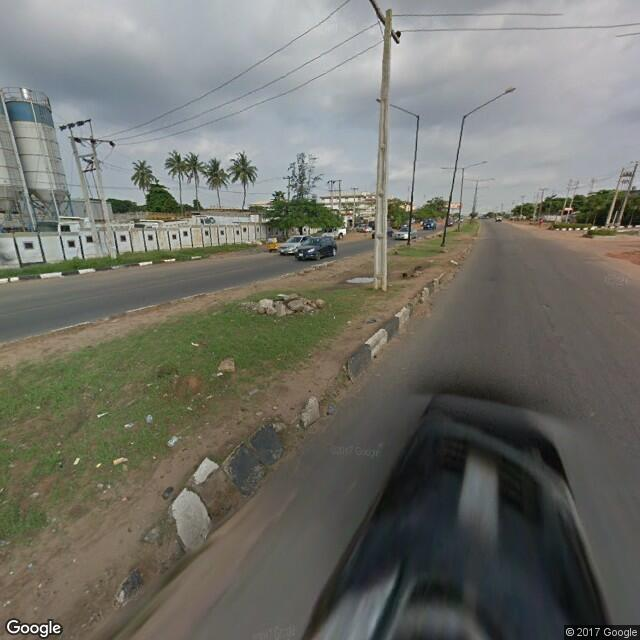

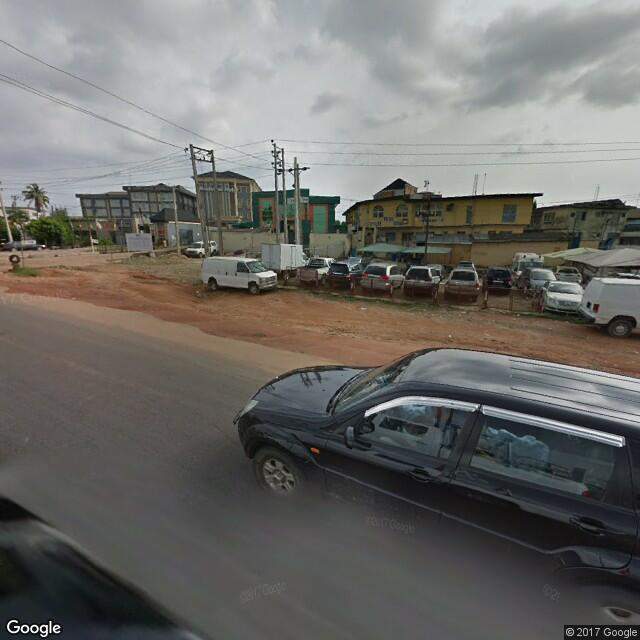

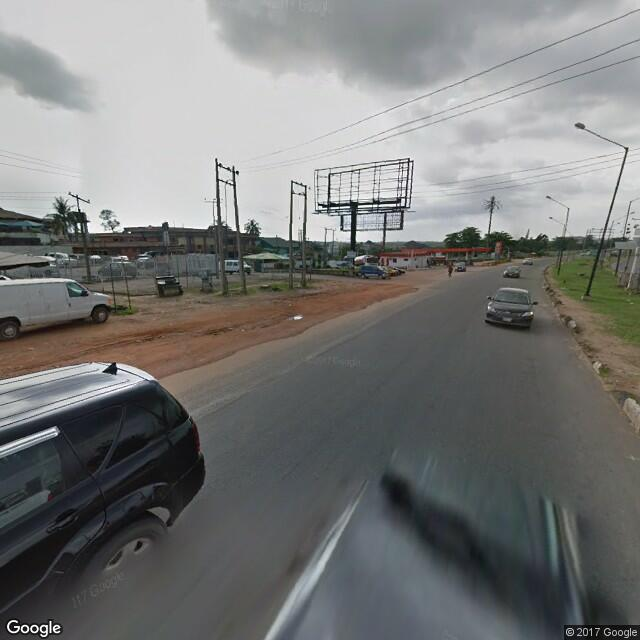

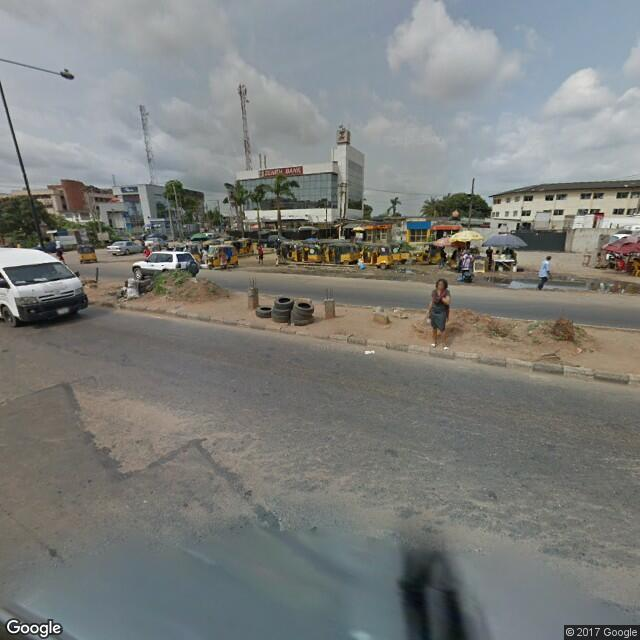

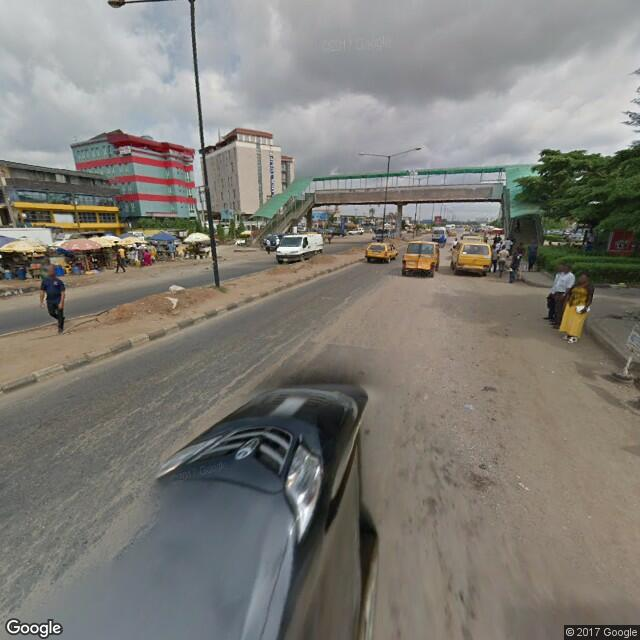

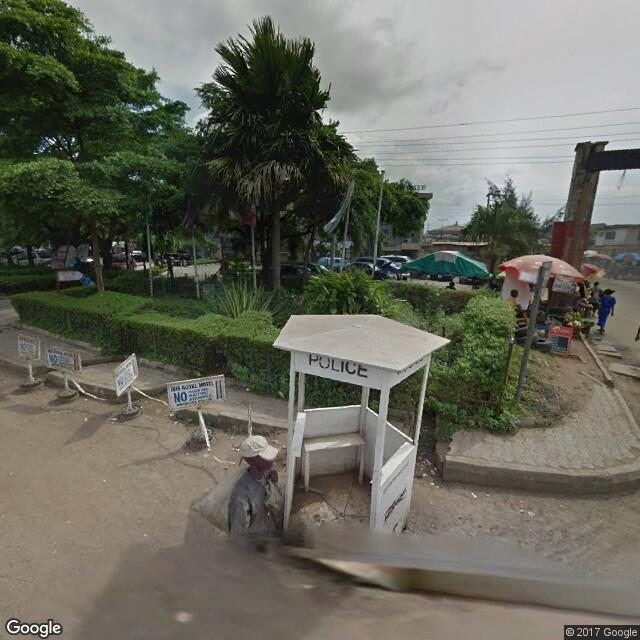

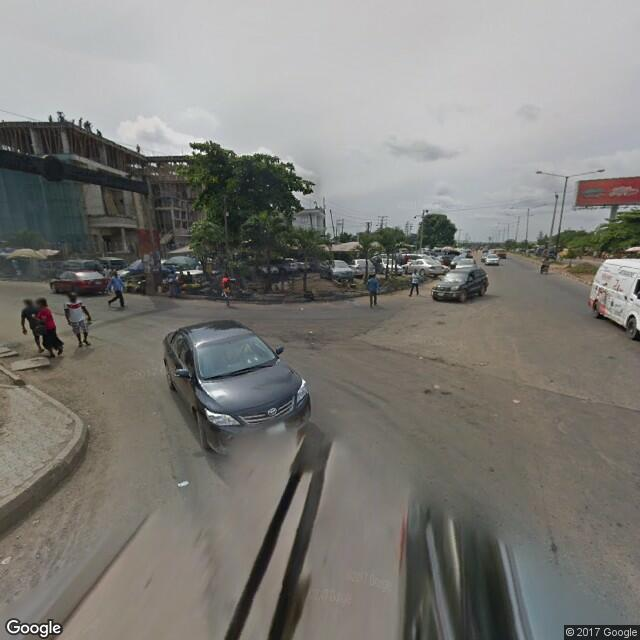

In [14]:
#from ipywidgets import Image
from IPython.display import Image
from IPython.display import display

imgs = ['img0', 'img90', 'img180', 'img270']
images = []
for row in df[imgs].itertuples(index=False):
    for i in xrange(len(imgs)):
        img = Image(data=b64decode(row[i]), width="640px")
        images.append(img)

display(*images[:10*4])

## Subplot

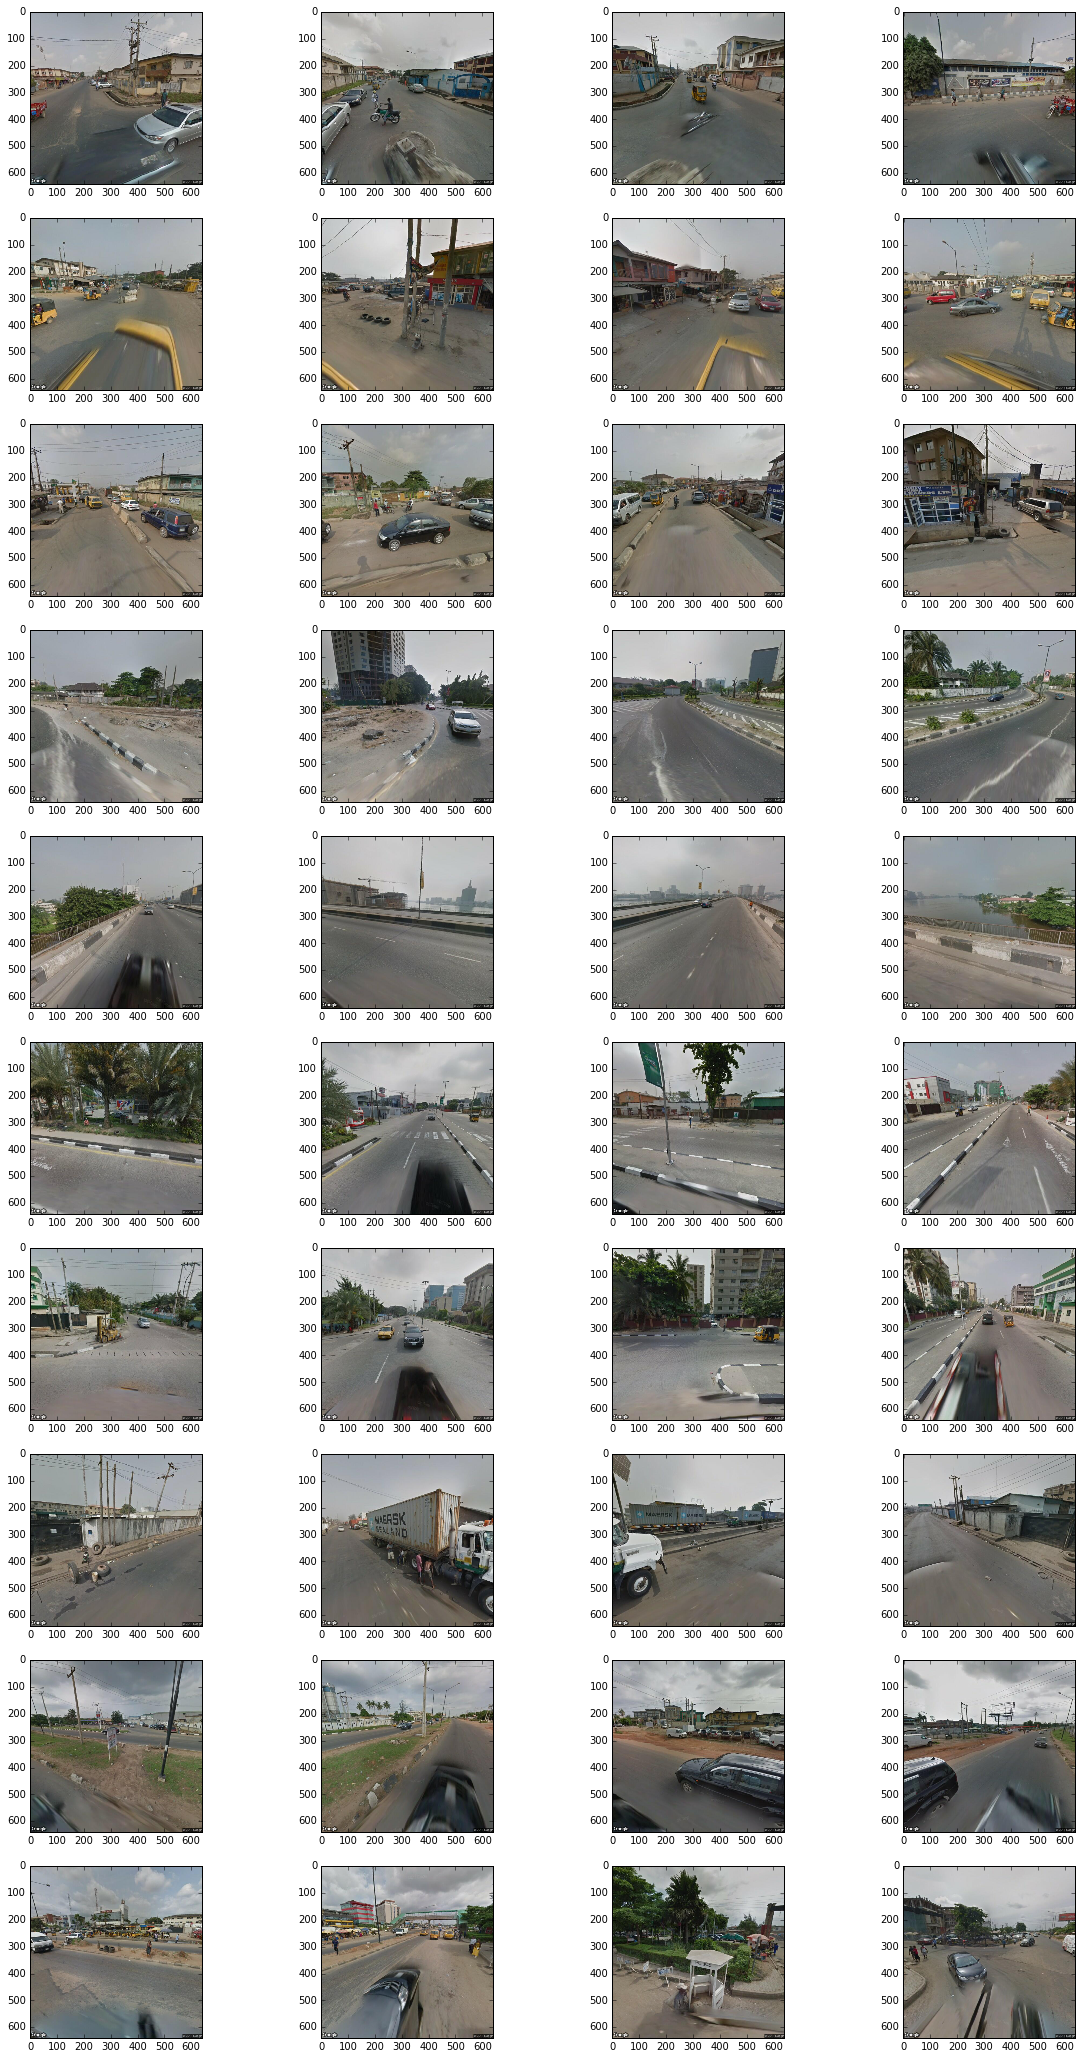

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image as PILImage
from cStringIO import StringIO

plotimages = images[:4*10]
plt.figure(figsize=(20, 40))
columns = 4
for i, image in enumerate(plotimages):
    plt.subplot(len(plotimages) / columns + 1, columns, i + 1)
    img = PILImage.open(StringIO(image.data))
    plt.imshow(img)


## Save and Export Data for Mturk

In [16]:
df.to_csv('{0:s}-roads-gsv.csv.gz'.format(city), index_label='id', encoding='utf-8', compression='gzip')

In [17]:
def export_image_to_file(i, data, basename):
    url = '{0:s}{1:04d}.jpg'.format(basename, i)
    with open('mturk/' + url, 'wb') as f:
        raw = b64decode(data)
        f.write(raw)
    return url

In [18]:
rdf = pd.read_csv('{0:s}-roads-gsv.csv.gz'.format(city))

In [19]:
rdf['url_img0'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img0, '{0:s}/img0_'.format(city)), axis=1)
rdf['url_img90'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img90, '{0:s}/img90_'.format(city)), axis=1)
rdf['url_img180'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img180, '{0:s}/img180_'.format(city)), axis=1)
rdf['url_img270'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img270, '{0:s}/img270_'.format(city)), axis=1)

In [20]:
del rdf['img0']
del rdf['img90']
del rdf['img180']
del rdf['img270']
rdf.to_csv('mturk/{0:s}.csv'.format(city), index=False)